In [40]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [124]:
DF=pd.read_csv('Salaries.csv')
DF

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
DF.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
DF.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
DF.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
116,Prof,A,30,29,Male,148500


In [7]:
DF.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
# checking Null Values
DF.isnull().sum()

# there are no Null Values.

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

Scatter plot

<AxesSubplot:xlabel='rank', ylabel='salary'>

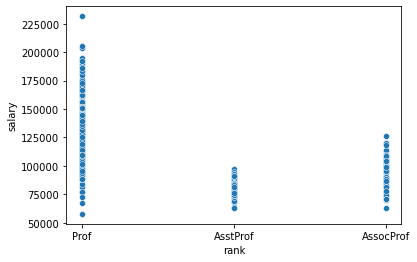

In [10]:
# scatter plot
sea.scatterplot(x='rank',y='salary',data=DF)

We can observe that the range salaries of prof are higher than that of asstprof and assocprof.
range of Salaries for Asstprof are lowest.

<AxesSubplot:xlabel='discipline', ylabel='salary'>

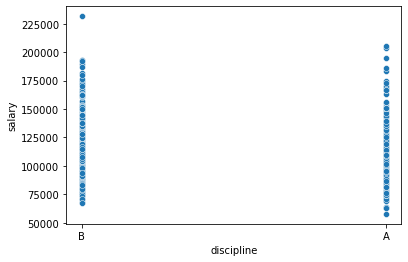

In [11]:
sea.scatterplot(x='discipline',y='salary',data=DF)

We can observe that the range of salaries for both tha descipline is almost same.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

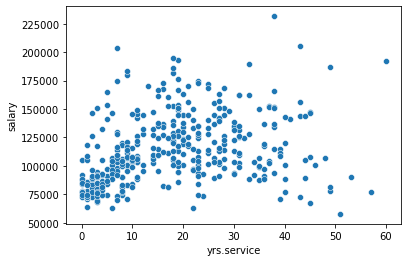

In [12]:
sea.scatterplot(x='yrs.service',y='salary',data=DF)

We can observe that as the years of service increases the salaries tend to increase.

<AxesSubplot:xlabel='sex', ylabel='salary'>

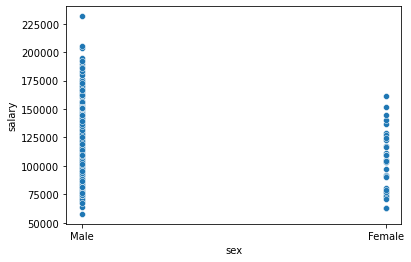

In [13]:
sea.scatterplot(x='sex',y='salary',data=DF)

here we can see that the range of salaries for the male employee is higher than that of Female employee

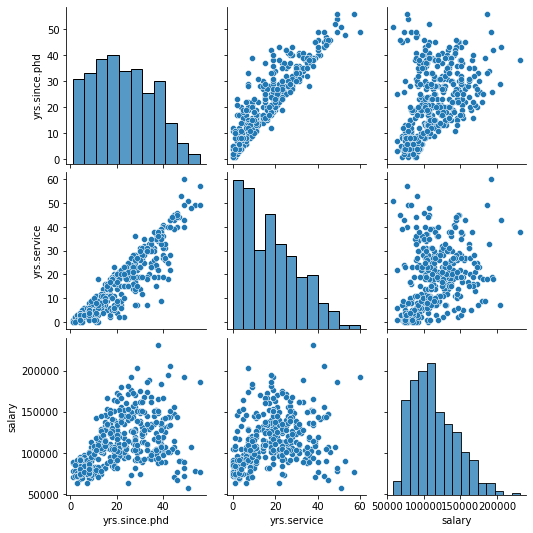

In [14]:
# pairplot
sea.pairplot(DF)

In [15]:
DF.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


its a symmetric matrix or mirror matrix

<AxesSubplot:>

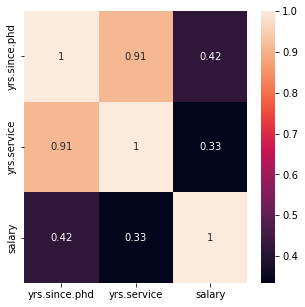

In [20]:
# heat Map
plt.figure(figsize=(5,5))
sea.heatmap(DF.corr(),annot=True)

Outcome:
    
    1. The yrs.since.phd has 42% correlation with Salary which is strong bond
   
    2. The yrs.service has 33% correlation with salary which is good bond

Descriptive Statistics.


In [28]:
# Describing Satasets:
DF.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


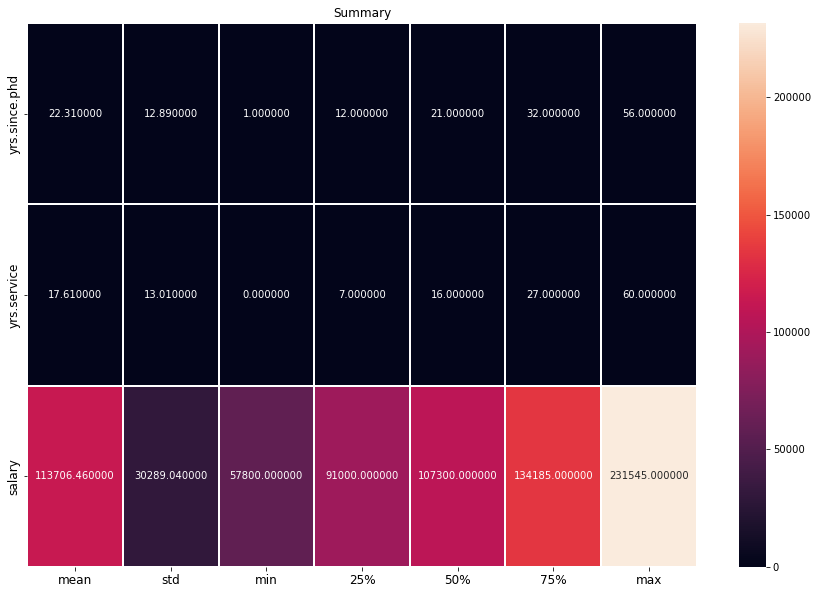

In [33]:
plt.figure(figsize=(15,10))
sea.heatmap(round(DF.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Summary')
plt.savefig('heatmap.png')
plt.show()

In [35]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers Checking 

yrs.since.phd       AxesSubplot(0.125,0.125;0.227941x0.755)
yrs.service      AxesSubplot(0.398529,0.125;0.227941x0.755)
salary           AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

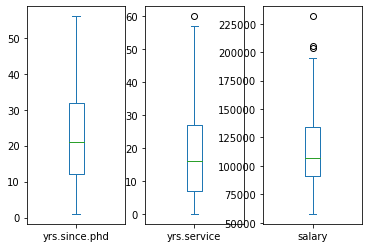

In [36]:
# box Plot
DF.plot(kind='box',subplots=True,layout=(1,3))

Here we can see the outliers are present in yrs.service and salary columns

In [ ]:
DF.drop('discipline',axis=1,inplace=True)

In [128]:
DF

,rank,yrs.since.phd,yrs.service,sex,salary
0,Prof,19,18,Male,139750
1,Prof,20,16,Male,173200
2,AsstProf,4,3,Male,79750
3,Prof,45,39,Male,115000
4,Prof,40,41,Male,141500
...,...,...,...,...,...
392,Prof,33,30,Male,103106
393,Prof,31,19,Male,150564
394,Prof,42,25,Male,101738
395,Prof,25,15,Male,95329


Label Encoder

In [130]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [131]:
List=['rank','sex']
for value in List:
    DF[value]=le.fit_transform(DF[value].astype(str))
DF

,rank,yrs.since.phd,yrs.service,sex,salary
0,2,19,18,1,139750
1,2,20,16,1,173200
2,1,4,3,1,79750
3,2,45,39,1,115000
4,2,40,41,1,141500
...,...,...,...,...,...
392,2,33,30,1,103106
393,2,31,19,1,150564
394,2,42,25,1,101738
395,2,25,15,1,95329


In [132]:
z=np.abs(zscore(DF))
z.shape

(397, 5)

In [133]:
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4],
       dtype=int64))

In [134]:
DF_new=DF[(z<3).all(axis=1)]

In [135]:
print('Old Data Frame',DF.shape)
print('New Data Frame',DF_new.shape)
print('Total Dropped Rows',DF.shape[0]-DF_new.shape[0])

Old Data Frame (397, 5)
New Data Frame (354, 5)
Total Dropped Rows 43


<AxesSubplot:ylabel='Frequency'>

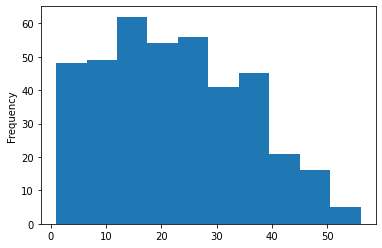

In [136]:
DF['yrs.since.phd'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

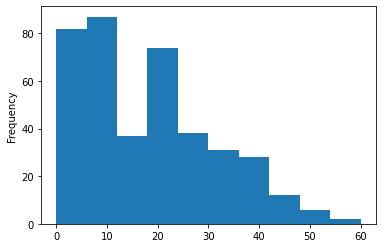

In [137]:
DF['yrs.service'].plot.hist() 

In [139]:
x=DF_new.iloc[:,:-1]

In [140]:
y=DF_new.iloc[:,-1]

In [141]:
x.shape

(354, 4)

In [142]:
y.shape

(354,)

In [143]:
from sklearn.preprocessing import power_transform

In [144]:
x=power_transform(x,method='yeo-johnson')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [147]:
ln.fit(x_train,y_train)

LinearRegression()

In [148]:
ln.score(x_train,y_train)

0.3307772175554088

We can interpret that the model is working at 33% efficiency

In [149]:
pred= ln.predict(x_test)
print('Predicted happiness score', pred)
print('Actual happiness score', y_test)

Predicted happiness score [127907.85040312 123354.41165293  80869.10375833 125116.4704855
 126725.86077909  92307.27686537 121450.05349616 125732.97602061
  89596.35160007 125015.83721543  94760.27495794  82457.03238429
 128114.01845534 123747.41714697  84923.5427742  124030.21813817
 122018.21924915  82091.0804956  124596.95723672 121382.58693535
 123187.26075908  92642.44196821 126211.71708406 128408.145631
  80727.51748299  92416.20431834 123700.50915613 122560.40511394
 100393.32350092 121665.6742389  128703.24766273  83610.6772444
 125351.33098635  89759.68631222  90277.15205174 126853.72831425
 128465.8860086  121912.83392797  85555.00065334  86162.74944262
 127486.21111431  91687.40871999 121912.83392797 133512.03004135
 125585.60064088  89664.89664982  81487.3127825   80467.78455766
  81852.36417804  83610.6772444  125259.7510081  125429.12747606
 127943.30273939  82876.80262174  84275.97158823  94799.29555579
 127758.66602915  94329.78893554 122852.79140999 125011.26682679
 12

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [151]:
print('mean_absolute_error :', mean_absolute_error(y_test,pred))
print('mean_squared_error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

mean_absolute_error : 16441.917510030766
mean_squared_error : 436718080.3341897
Root Mean Squared Error : 20897.80084923267


In [152]:
from sklearn.metrics import r2_score

In [153]:
print(r2_score(y_test,pred))

0.38609819065336026
